In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-07-11 11:49:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.9.208, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   168MB/s    in 0.9s    

2021-07-11 11:49:51 (168 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-07-11 11:49:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.188.208, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
train_horse_name = os.listdir(train_horse_dir)
print(train_horse_name[:10])
train_human_name = os.listdir(train_human_dir)
print(train_human_name[:10])

['horse19-0.png', 'horse03-5.png', 'horse31-1.png', 'horse37-0.png', 'horse18-8.png', 'horse15-8.png', 'horse06-4.png', 'horse25-8.png', 'horse22-9.png', 'horse06-0.png']
['human14-00.png', 'human03-29.png', 'human03-28.png', 'human03-15.png', 'human15-29.png', 'human02-17.png', 'human13-01.png', 'human15-15.png', 'human13-00.png', 'human13-20.png']


In [ ]:
print("Total training horse images: ", len(train_horse_name))
print("Total training human images: ", len(train_human_name))

Total training horse images:  500
Total training human images:  527


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

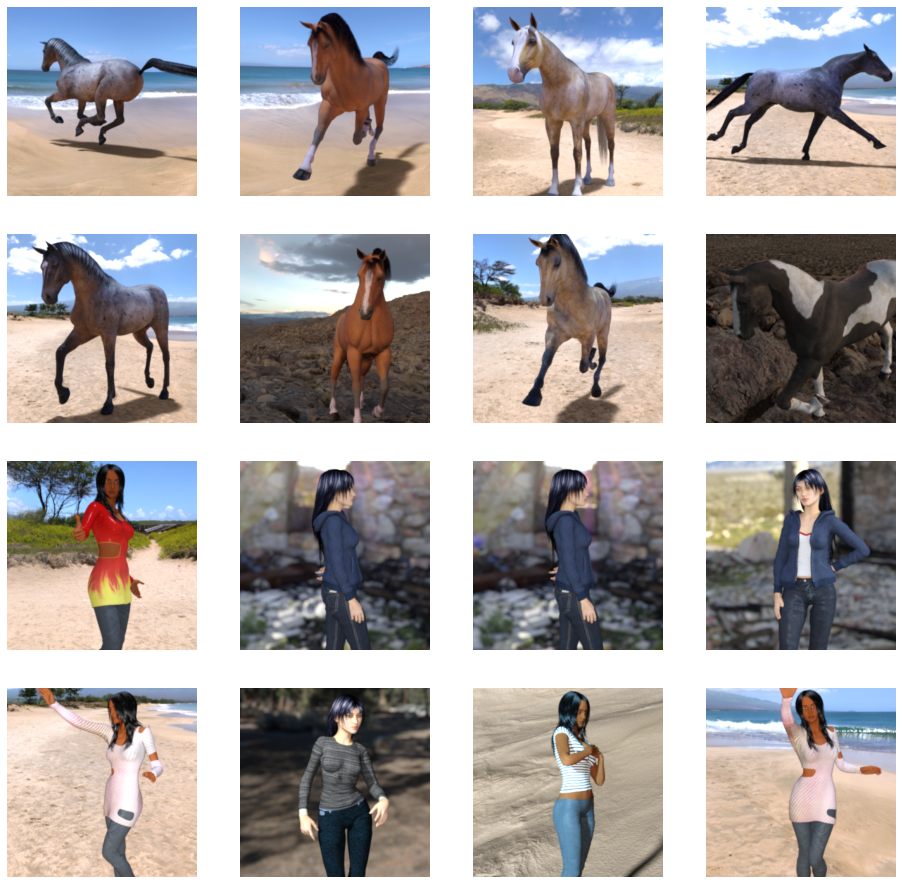

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
                                                  '/tmp/horse-or-human/',
                                                  target_size = (300, 300),
                                                  batch_size = 128,
                                                  class_mode = 'binary')

validation_datagen = ImageDataGenerator(rescale = 1/255)
validation_generator = validation_datagen.flow_from_directory(
                                        '/tmp/validation-horse-or-human/',
                                        target_size = (300, 300),
                                        batch_size = 32,
                                        class_mode = 'binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(
                    train_generator,
                    validation_data = validation_generator,
                    epochs = 12,
                    steps_per_epoch = 8,
                    validation_steps = 8,
                    verbose = 1)

Epoch 1/12
8/8 [==============================] - 7s 881ms/step - loss: 0.0619 - accuracy: 0.9755 - val_loss: 1.2696 - val_accuracy: 0.8672
Epoch 2/12
8/8 [==============================] - 7s 858ms/step - loss: 0.0136 - accuracy: 0.9967 - val_loss: 1.7031 - val_accuracy: 0.8594
Epoch 3/12
8/8 [==============================] - 7s 859ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.8019 - val_accuracy: 0.8672
Epoch 4/12
8/8 [==============================] - 7s 854ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.9437 - val_accuracy: 0.8672
Epoch 5/12
8/8 [==============================] - 7s 853ms/step - loss: 6.7239e-04 - accuracy: 1.0000 - val_loss: 2.1878 - val_accuracy: 0.8516
Epoch 6/12
8/8 [==============================] - 7s 870ms/step - loss: 3.4998e-04 - accuracy: 1.0000 - val_loss: 1.9212 - val_accuracy: 0.8750
Epoch 7/12
8/8 [==============================] - 7s 857ms/step - loss: 3.7616e-04 - accuracy: 1.0000 - val_loss: 2.6104 - val_accuracy: 0.8477
Epoch 8/

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size = (300, 300))
  x = image.img_to_array(img)
  x = x/255
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)

  print(classes[0])
  if classes[0] > 0.5 :
    print(fn + " is a human.")
  else:
    print(fn + " is a horse.")
  

Saving horse-1.jpg to horse-1 (5).jpg
Saving horse-2.jpg to horse-2 (1).jpg
Saving horse-3.jpg to horse-3 (1).jpg
Saving human-1.jpg to human-1 (1).jpg
Saving human-2.jpg to human-2 (2).jpg
Saving human-3.jpg to human-3 (1).jpg
[0.0025958]
horse-1.jpg is a horse.
[0.99833053]
horse-2.jpg is a human.
[0.322444]
horse-3.jpg is a horse.
[0.9999981]
human-1.jpg is a human.
[0.99999964]
human-2.jpg is a human.
[0.59726745]
human-3.jpg is a human.


<Figure size 432x288 with 0 Axes>

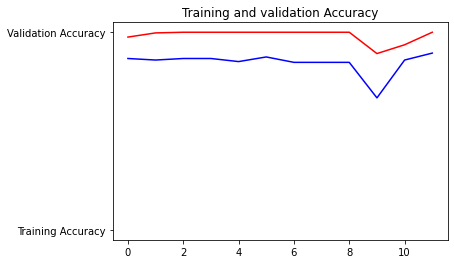

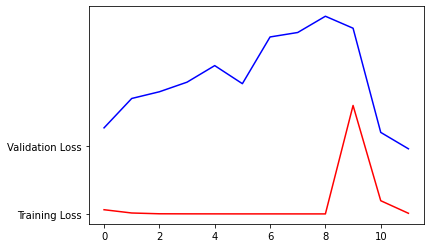

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation Accuracy')
plt.figure()

#Plotting training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()